In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Data Preprocessing
### Training Image Preprocessing 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[206.5  199.5  206.5 ]
   [204.25 197.25 204.25]
   [201.   194.   201.  ]
   ...
   [202.   195.   202.  ]
   [196.75 189.75 196.75]
   [202.5  195.5  202.5 ]]

  [[205.75 198.75 205.75]
   [206.75 199.75 206.75]
   [190.75 183.75 190.75]
   ...
   [209.   202.   209.  ]
   [199.   192.   199.  ]
   [201.75 194.75 201.75]]

  [[209.5  202.5  209.5 ]
   [217.5  210.5  217.5 ]
   [215.25 208.25 215.25]
   ...
   [210.   203.   210.  ]
   [211.25 204.25 211.25]
   [210.5  203.5  210.5 ]]

  ...

  [[172.75 161.75 167.75]
   [171.5  160.5  166.5 ]
   [170.75 159.75 165.75]
   ...
   [175.5  166.5  171.5 ]
   [173.5  164.5  169.5 ]
   [177.25 168.25 173.25]]

  [[177.5  166.5  172.5 ]
   [180.25 169.25 175.25]
   [173.75 162.75 168.75]
   ...
   [178.75 169.75 174.75]
   [156.75 147.75 152.75]
   [172.75 163.75 168.75]]

  [[161.5  150.5  156.5 ]
   [178.   167.   173.  ]
   [166.25 155.25 161.25]
   ...
   [177.25 168.25 173.25]
   [176.   167.   172.  ]
   [181.5  172.5  17

### To avoid Overshooting
1. Choose small learning rate default 0.001 we take 0.0001
2. There may be chance of Underfitting so increase number of neuron
3. Add more Convolution layer to extract more features from images there may be possibility that model unable to capture relevant feature or model confusing due to lack of feature so feed with more feature
4. 

# Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation="relu", input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3, padding='same', activation = "relu"))
model.add(Conv2D(filters=64,kernel_size=3, padding='same', activation = "relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3, padding='same', activation = "relu"))
model.add(Conv2D(filters=128,kernel_size=3,  activation = "relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3, padding='same', activation = "relu"))
model.add(Conv2D(filters=256,kernel_size=3,  activation = "relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3, padding='same', activation = "relu"))
model.add(Conv2D(filters=512,kernel_size=3,  activation = "relu"))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output LAyer 
model.add(Dense(units=38,activation='softmax'))

# Compiling Model

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [20]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 194s 82ms/step - accuracy: 0.2710 - loss: 2.6024 - val_accuracy: 0.7195 - val_loss: 0.8787
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 116s 53ms/step - accuracy: 0.7393 - loss: 0.8151 - val_accuracy: 0.8403 - val_loss: 0.4855
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.8241 - loss: 0.5479 - val_accuracy: 0.8419 - val_loss: 0.4985
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.8532 - loss: 0.4633 - val_accuracy: 0.8758 - val_loss: 0.3852
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 53ms/step - accuracy: 0.8647 - loss: 0.4270 - val_accuracy: 0.8770 - val_loss: 0.3786
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.8736 - loss: 0.3979 - val_accuracy: 0.8650 - val_loss: 0.4318
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 115s 52ms/step - accuracy: 0.8764 - loss: 0.3982 - val_accuracy: 0.8676 - val_loss: 0.4193
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 116s 53ms/step - accuracy: 

# Model Evalution

In [21]:
#model evalution on Training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9169 - loss: 0.2562


In [22]:
#model evalution on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.8855 - loss: 0.3528


# Saving Model

In [23]:
model.save("trained_model.keras")

In [24]:
training_history.history

{'accuracy': [0.46442848443984985,
  0.7703108191490173,
  0.8328472971916199,
  0.8537164926528931,
  0.8635749220848083,
  0.8724517822265625,
  0.877544641494751,
  0.8772743344306946,
  0.8779287338256836,
  0.8740450739860535],
 'loss': [1.817640781402588,
  0.7186574339866638,
  0.5224518775939941,
  0.46092119812965393,
  0.43007826805114746,
  0.4038448929786682,
  0.3912900984287262,
  0.39207977056503296,
  0.3941650688648224,
  0.4038616418838501],
 'val_accuracy': [0.7194969058036804,
  0.8402572274208069,
  0.8419075608253479,
  0.8758251667022705,
  0.8769633769989014,
  0.865012526512146,
  0.8675734400749207,
  0.8967106938362122,
  0.8814022541046143,
  0.8887434601783752],
 'val_loss': [0.8786741495132446,
  0.485538125038147,
  0.49851903319358826,
  0.38516899943351746,
  0.37863752245903015,
  0.43175676465034485,
  0.41934528946876526,
  0.3252400755882263,
  0.36852166056632996,
  0.34567126631736755]}

In [25]:
#Recording History in Json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

# Accuracy Visualization

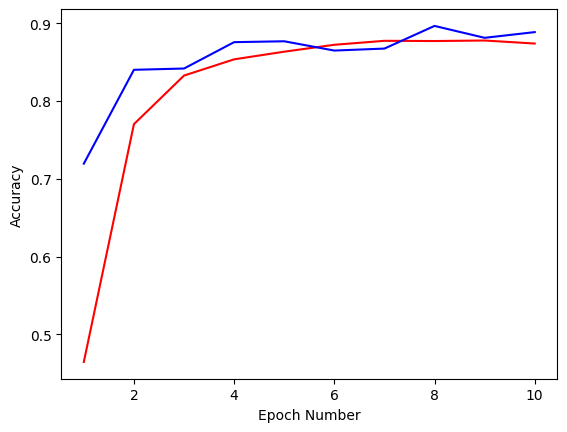

In [26]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label="Training Accuracy")
plt.plot(epochs,training_history.history['val_accuracy'],color='blue', label='Validation Accuracy')
plt.xlabel("Epoch Number")
plt.ylabel("Accuracy")
plt.show()

### Some other metrics for model evaluation

In [27]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)


Found 17572 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step


(array([[9.99522328e-01, 3.67271190e-04, 4.98260363e-07, ...,
         5.84865323e-15, 4.07130968e-10, 1.30006986e-11],
        [9.93026853e-01, 5.34692546e-03, 4.26833992e-07, ...,
         2.03286498e-12, 7.96479753e-08, 8.12431633e-09],
        [1.00000000e+00, 8.20312134e-12, 1.54164127e-12, ...,
         3.87753915e-32, 4.11769549e-17, 1.16724565e-17],
        ...,
        [6.01657412e-05, 5.53974431e-08, 2.38037319e-04, ...,
         4.55902843e-03, 1.68926417e-04, 1.00430520e-02],
        [2.94901992e-10, 4.38311819e-22, 8.71047193e-11, ...,
         3.00255749e-07, 2.62454747e-15, 9.99996066e-01],
        [9.32642479e-08, 1.75513026e-09, 3.29135275e-09, ...,
         2.44655585e-05, 2.13148844e-04, 4.87192839e-01]], dtype=float32),
 (17572, 38))

In [30]:
predicted_categories = tf.argmax(y_pred,axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 33, 37, 37])>

In [31]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [32]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

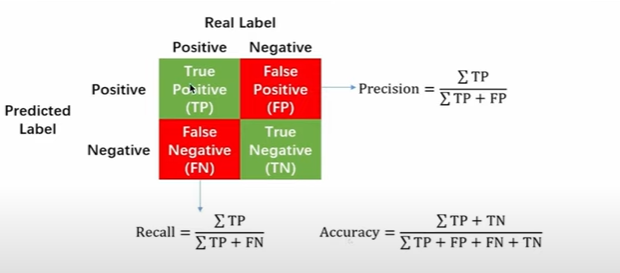

In [33]:
from sklearn.metrics import classification_report , confusion_matrix

In [34]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.93      0.84      0.88       504
                                 Apple___Black_rot       0.95      0.94      0.95       497
                          Apple___Cedar_apple_rust       0.95      0.90      0.93       440
                                   Apple___healthy       0.76      0.90      0.82       502
                               Blueberry___healthy       0.91      0.86      0.89       454
          Cherry_(including_sour)___Powdery_mildew       0.90      0.95      0.92       421
                 Cherry_(including_sour)___healthy       0.97      0.89      0.93       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.88      0.89       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.91      0.

# Confusion Matrix 

In [35]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[422,   9,   2, ...,   0,   0,   0],
       [  2, 467,   0, ...,   0,   1,   0],
       [  1,   4, 397, ...,   0,   0,   0],
       ...,
       [  0,   0,   1, ..., 417,   0,   0],
       [  0,   0,   0, ...,   0, 424,   1],
       [  2,   0,   0, ...,   0,   2, 390]])

### Confusion Matrix Visualization

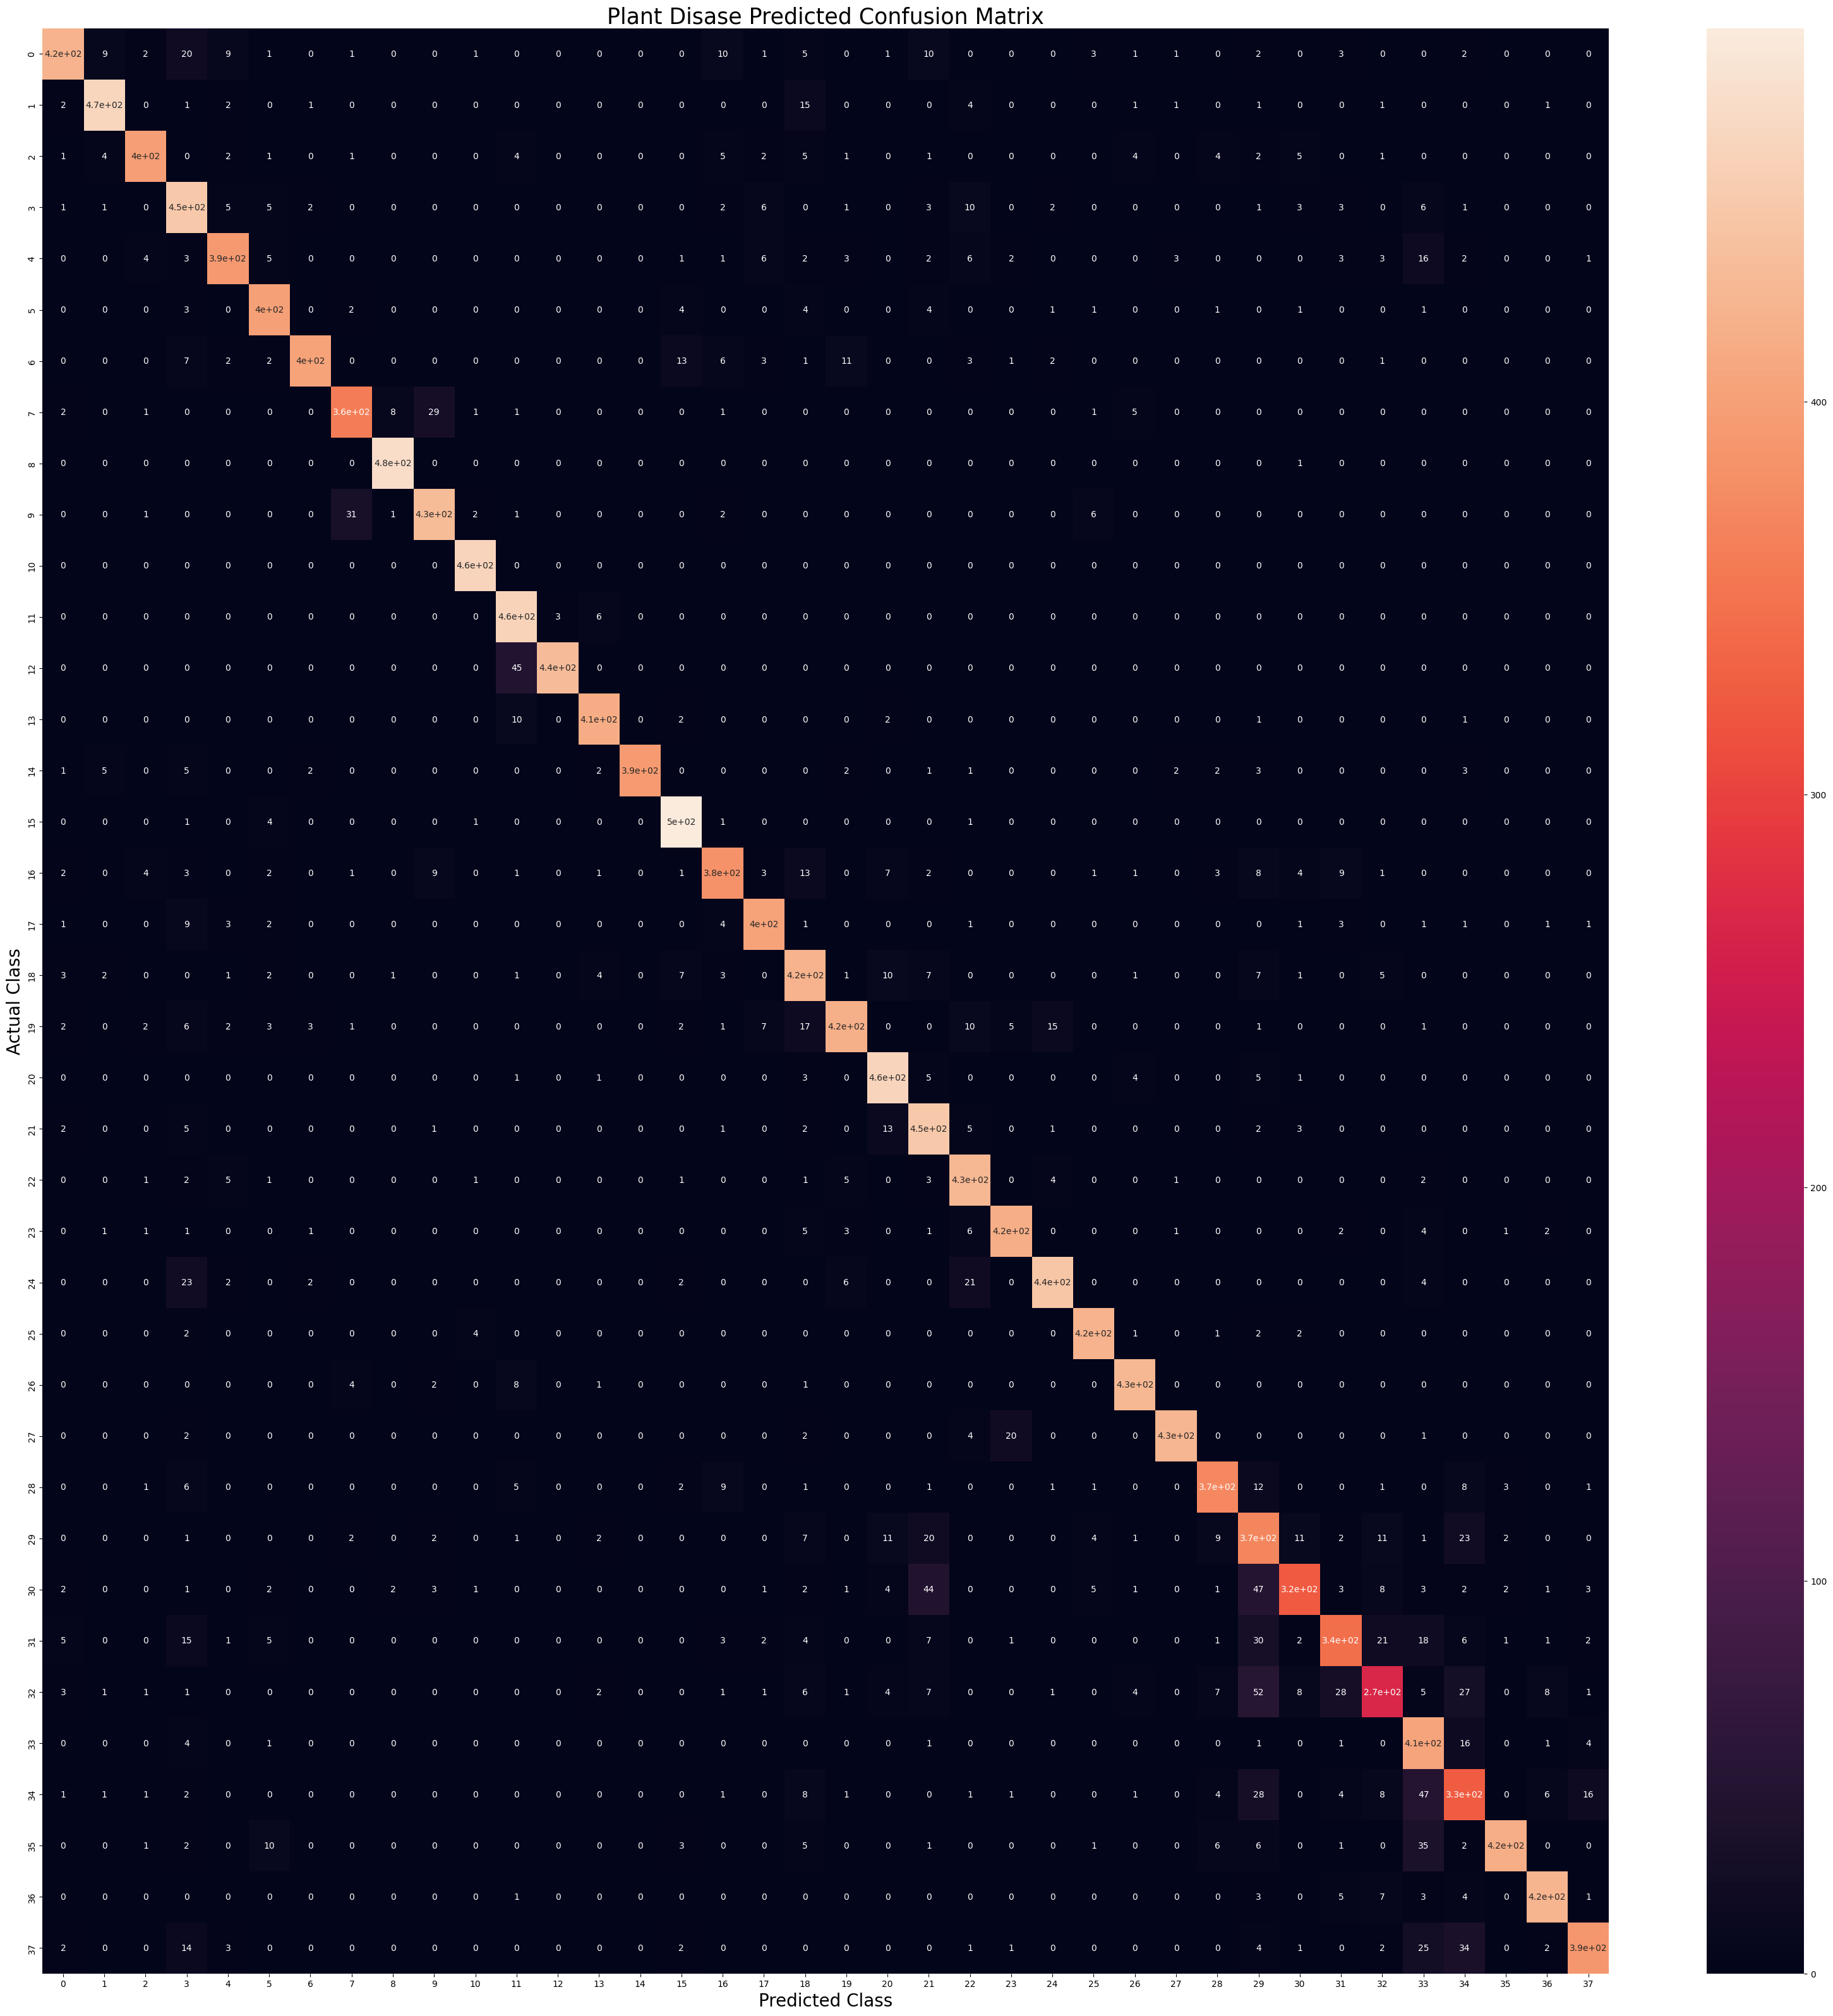

In [36]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("Actual Class", fontsize= 20)
plt.title("Plant Disase Predicted Confusion Matrix", fontsize = 25)
plt.show()

# Test Plant Disase

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [38]:
model_plant = tf.keras.models.load_model('/kaggle/working/trained_model.keras')

In [39]:
model_plant.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

# Visualizaing Single Image of Test Set

<function matplotlib.pyplot.show(close=None, block=None)>

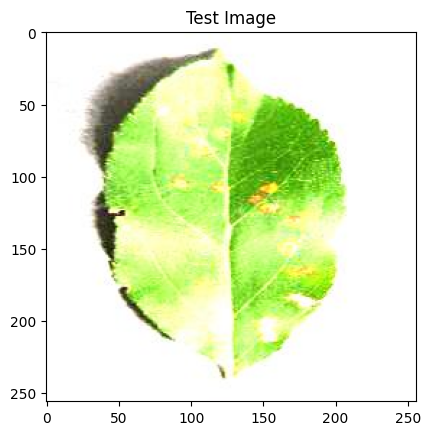

In [40]:
import cv2 
import numpy as np
image_path = "/kaggle/input/new-plant-diseases-dataset/test/test/AppleCedarRust1.JPG"
#Reading Image
img = cv2.imread(image_path)
#Convert BGR imsage to RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.show

# Testing Model

In [41]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [42]:
prediction = model_plant.predict(input_arr)
prediction, prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(array([[2.29340250e-04, 1.00084662e-01, 6.69713914e-01, 3.72159411e-05,
         1.10445274e-02, 1.13695307e-04, 1.80107793e-06, 6.17538288e-04,
         1.15722405e-05, 9.31491886e-05, 2.95770128e-08, 1.87233761e-02,
         1.05665973e-03, 1.26254352e-04, 4.51406049e-06, 1.46419279e-05,
         1.03750359e-02, 1.72991992e-03, 1.00860745e-01, 6.07825641e-04,
         5.84099442e-04, 1.98971527e-03, 8.65442635e-05, 6.32406736e-05,
         2.63292532e-06, 5.98140787e-06, 1.89288873e-02, 3.54749391e-05,
         7.31229782e-03, 1.57718696e-02, 9.80985584e-04, 3.98594013e-04,
         1.15085077e-02, 3.70823764e-05, 2.46653613e-02, 2.01391711e-04,
         1.67600357e-03, 3.04962246e-04]], dtype=float32),
 (1, 38))

In [43]:
result_index = np.argmax(prediction)
result_index

2

Text(0.5, 1.0, 'Disase Name: Apple___Cedar_apple_rust')

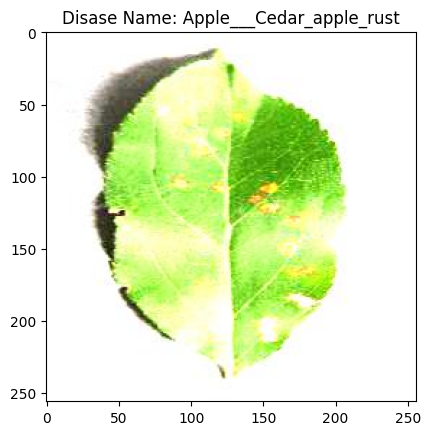

In [44]:
model_plant.prediction=class_name[result_index]
plt.imshow(img)
plt.title(f"Disase Name: {model_plant.prediction}")


In [45]:
model_plant.prediction

'Apple___Cedar_apple_rust'